# DSC 540
# Week 5&6
# Author: Muthukumar Kadhirvel
# 4/23/2022

# Milestone 2

Step 1 - Drop Unnecessary columns                                                                                               
We are dropping the following columns as they have data that is irrelevant to the problem we are trying to solve.               
genres/homepage/keywords/spoken_languages/original_title/overview/production_companies/production_countries/status/tagline/id/
popularity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
movies_df = pd.read_csv("movies.csv")
movies_df = movies_df.drop(['genres','homepage','keywords','spoken_languages','original_title','overview'], axis=1)
movies_df = movies_df.drop(['production_companies','production_countries','status','tagline','id','popularity'], axis=1)
print(movies_df.head())
size_initial = len(movies_df)

      budget original_language release_date     revenue  runtime  \
0  237000000                en   12/10/2009  2787965087    162.0   
1  300000000                en    5/19/2007   961000000    169.0   
2  245000000                en   10/26/2015   880674609    148.0   
3  250000000                en    7/16/2012  1084939099    165.0   
4  260000000                en     3/7/2012   284139100    132.0   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124  


Step 2 - Rearrange & Replace Headers                                                                                           
We will rearrange the columns to make more sense in the order of impactful columns.                                             
We will change the vote_average column to be rating as it makes more sense and similarly original_language to be language.

In [2]:
movies_df = movies_df[['title','release_date','budget','revenue','runtime','vote_average','vote_count','original_language']]
movies_df.rename(columns = {'vote_average':'rating', 'original_language':'language'}, inplace = True)
print(movies_df.head())

                                      title release_date     budget  \
0                                    Avatar   12/10/2009  237000000   
1  Pirates of the Caribbean: At World's End    5/19/2007  300000000   
2                                   Spectre   10/26/2015  245000000   
3                     The Dark Knight Rises    7/16/2012  250000000   
4                               John Carter     3/7/2012  260000000   

      revenue  runtime  rating  vote_count language  
0  2787965087    162.0     7.2       11800       en  
1   961000000    169.0     6.9        4500       en  
2   880674609    148.0     6.3        4466       en  
3  1084939099    165.0     7.6        9106       en  
4   284139100    132.0     6.1        2124       en  


Step 3 - Find Duplicates                                                                                                       
Title is the key field in our data frame and hence we check for duplicates and find 6 duplicates (3 sets of movies with same names) and hence we are removing them

In [3]:
print("Does title have duplicates - "+str(any(movies_df.title.duplicated())))
duplicate_df = movies_df[movies_df.duplicated(['title'])]
movies_df.drop_duplicates(subset ="title", keep = False, inplace = True)
print(movies_df.head())

Does title have duplicates - True
                                      title release_date     budget  \
0                                    Avatar   12/10/2009  237000000   
1  Pirates of the Caribbean: At World's End    5/19/2007  300000000   
2                                   Spectre   10/26/2015  245000000   
3                     The Dark Knight Rises    7/16/2012  250000000   
4                               John Carter     3/7/2012  260000000   

      revenue  runtime  rating  vote_count language  
0  2787965087    162.0     7.2       11800       en  
1   961000000    169.0     6.9        4500       en  
2   880674609    148.0     6.3        4466       en  
3  1084939099    165.0     7.6        9106       en  
4   284139100    132.0     6.1        2124       en  


Step 4 - Format data into a more readable format                                                                               
language is not in a readable format and change them to have the correct language value using iso639 python package

In [4]:
%pip install iso639-lang
from iso639 import Lang
movies_df['language'] = movies_df['language'].apply(lambda x: Lang(x).name)
print(movies_df.head())

Note: you may need to restart the kernel to use updated packages.
                                      title release_date     budget  \
0                                    Avatar   12/10/2009  237000000   
1  Pirates of the Caribbean: At World's End    5/19/2007  300000000   
2                                   Spectre   10/26/2015  245000000   
3                     The Dark Knight Rises    7/16/2012  250000000   
4                               John Carter     3/7/2012  260000000   

      revenue  runtime  rating  vote_count language  
0  2787965087    162.0     7.2       11800  English  
1   961000000    169.0     6.9        4500  English  
2   880674609    148.0     6.3        4466  English  
3  1084939099    165.0     7.6        9106  English  
4   284139100    132.0     6.1        2124  English  


Step 5 - Identify outliers and bad data    
Convert all 0 of numeric columns to null and then check for null values in all the columns.                                     
title/language has no null values which is good because title is the key field.                                                 
budget/revenue/rating/vote_count/release_date/runtime have null values and so needs to be dropped for rows with null values.   
Then we create boxplots for budget/revenue/runtime/rating/vote_count and then remove outliers.                                 
We started with 4803 rows and ended up with 2757 rows.

Does title have NaN - False
Does release_date have NaN - True
Does budget have NaN - True
Does revenue have NaN - True
Does runtime have NaN - True
Does rating have NaN - True
Does vote_count have NaN - True
Does language have NaN - False


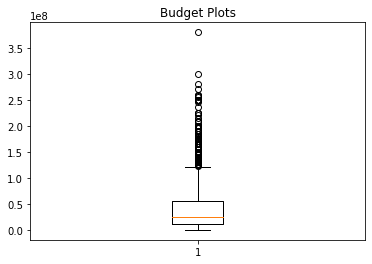

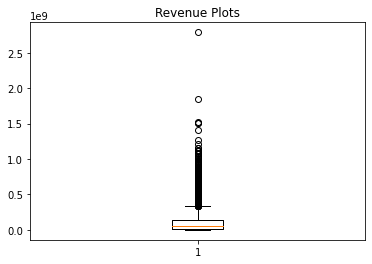

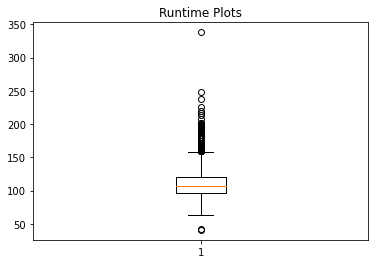

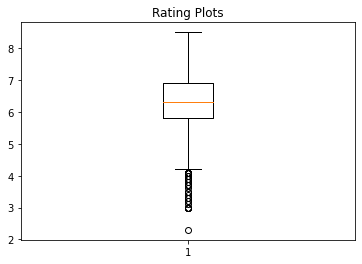

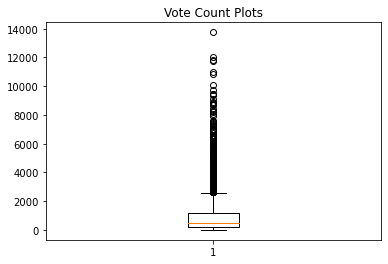

                      title release_date       budget      revenue  runtime  \
97            Shin Godzilla    7/29/2016   15000000.0   77000000.0    120.0   
151                 Beowulf    11/5/2007   70000000.0  195735876.0    115.0   
155  Fun with Dick and Jane   12/21/2005  100000000.0  202026112.0     90.0   
180    The Bourne Ultimatum     8/3/2007   70000000.0  442824138.0    115.0   
188                    Salt    7/21/2010  110000000.0  293329073.0    100.0   

     rating  vote_count  language  
97      6.5       143.0  Japanese  
151     5.5       841.0   English  
155     5.9       627.0   English  
180     7.3      2888.0   English  
188     6.2      2093.0   English  
Original size was 4803 and new size is 2757


In [5]:
movies_df.release_date = movies_df.release_date.replace(0, np.nan)
movies_df.budget = movies_df.budget.replace(0, np.nan)
movies_df.revenue = movies_df.revenue.replace(0, np.nan)
movies_df.runtime = movies_df.runtime.replace(0, np.nan)
movies_df.rating = movies_df.rating.replace(0, np.nan)
movies_df.vote_count = movies_df.vote_count.replace(0, np.nan)
print("Does title have NaN - "+str(any(movies_df.title.isnull())))
print("Does release_date have NaN - "+str(any(movies_df.release_date.isnull())))
print("Does budget have NaN - "+str(any(movies_df.budget.isnull())))
print("Does revenue have NaN - "+str(any(movies_df.revenue.isnull())))
print("Does runtime have NaN - "+str(any(movies_df.runtime.isnull())))
print("Does rating have NaN - "+str(any(movies_df.rating.isnull())))
print("Does vote_count have NaN - "+str(any(movies_df.vote_count.isnull())))
print("Does language have NaN - "+str(any(movies_df.language.isnull())))
movies_df = movies_df.dropna()
plt.boxplot(movies_df.budget)
plt.title("Budget Plots")
plt.show()
plt.boxplot(movies_df.revenue)
plt.title("Revenue Plots")
plt.show()
plt.boxplot(movies_df.runtime)
plt.title("Runtime Plots")
plt.show()
plt.boxplot(movies_df.rating)
plt.title("Rating Plots")
plt.show()
plt.boxplot(movies_df.vote_count)
plt.title("Vote Count Plots")
plt.show()
movies_df = movies_df.drop(movies_df[movies_df.budget > 125000000].index)
movies_df = movies_df.drop(movies_df[movies_df.revenue > 500000000].index)
movies_df = movies_df.drop(movies_df[movies_df.runtime > 160].index)
movies_df = movies_df.drop(movies_df[movies_df.rating < 4].index)
movies_df = movies_df.drop(movies_df[movies_df.vote_count > 3000].index)
print(movies_df.head())
print("Original size was "+str(size_initial)+" and new size is "+str(len(movies_df)))